<a href="https://colab.research.google.com/github/Deleolowo/Assignment/blob/main/Project_5_Basic_Natural_Language_Processing_with_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unsupervised NLP Clustering and Visualization: 20 Newsgroups Dataset**

This Colab notebook provides a complete implementation of unsupervised topic clustering using the K-Means algorithm on a sparse TF-IDF feature representation of text data.

Objective: Automatically discover the thematic groups within the 20 Newsgroups dataset and evaluate the clustering quality.

1. Setup and Library Imports

Run this cell first to import all necessary libraries for data processing, clustering, and visualization.

In [1]:
# Unsupervised Image Clustering and Visualization (NLP Project)

### 1. Setup and Library Imports
# Run this cell first to import all necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, silhouette_score

# Optional: For basic Word Embedding illustration (requires installation in Colab)
# !pip install gensim
# from gensim.models import Word2Vec
# from nltk.tokenize import word_tokenize
# import nltk
# nltk.download('punkt')

sns.set_style("whitegrid")
print("Libraries imported successfully.")

Libraries imported successfully.


2. Text Data Preparation and Feature Extraction (TF-IDF)

2.1 Data Loading and Preprocessing

We load the full 20 Newsgroups dataset. Crucially, we remove headers, footers, and quotes to eliminate noisy text (like email signatures) that would otherwise skew the clustering results.

In [2]:
### 2. Text Data Preparation and Feature Extraction (TF-IDF)

# --- A. Data Loading ---
# We load the full 20 Newsgroups dataset, removing headers, footers, and quotes
# which often contain noisy text (e.g., email signatures) that skew clustering results.

print("\nLoading 20 Newsgroups dataset...")
t0 = time()
# Note: target_names holds the true category labels (our ground truth for evaluation)
dataset = fetch_20newsgroups(
    subset='all',
    shuffle=True,
    random_state=42,
    remove=('headers', 'footers', 'quotes')
)
data = dataset.data
target_labels = dataset.target
true_k = len(dataset.target_names)
load_time = time() - t0

print(f"Data loaded in {load_time:.2f}s")
print(f"Total documents: {len(data)}")
print(f"True number of clusters (newsgroups): {true_k}")

# --- B. Feature Extraction using TF-IDF ---
# TF-IDF (Term Frequency-Inverse Document Frequency) is chosen over BoW
# because it weights rare, topic-specific words higher, leading to better thematic clustering.
# The TfidfVectorizer handles tokenization, lowercasing, and stopword removal internally.

print("Performing TF-IDF feature extraction...")
t0 = time()
vectorizer = TfidfVectorizer(
    max_df=0.85,          # Ignore terms that appear in more than 85% of the documents
    min_df=5,             # Ignore terms that appear in less than 5 documents
    stop_words='english',
)

X = vectorizer.fit_transform(data)
feature_names = vectorizer.get_feature_names_out()
vectorization_time = time() - t0

print(f"Vectorization done in {vectorization_time:.2f}s")
print(f"Shape of TF-IDF matrix (Documents x Features): {X.shape}")


Loading 20 Newsgroups dataset...
Data loaded in 22.94s
Total documents: 18846
True number of clusters (newsgroups): 20
Performing TF-IDF feature extraction...
Vectorization done in 2.66s
Shape of TF-IDF matrix (Documents x Features): (18846, 24164)


2.2 Feature Extraction: TF-IDF Vectorization

TF-IDF (Term Frequency-Inverse Document Frequency) is used because it assigns higher weights to words that are descriptive of a topic (frequent in one document, rare across the corpus).

3. Unsupervised Learning Application (K-Means)

The K-Means algorithm is applied with $k=20$ (matching the known number of newsgroups).

In [3]:
### 3. Unsupervised Learning Application (K-Means Clustering)

# We choose K-Means with k=20, matching the known number of newsgroups.

print("\nStarting K-Means clustering (k=20)...")
t0 = time()
km = KMeans(
    n_clusters=true_k,
    init='k-means++',      # Uses smarter initialization for faster convergence
    max_iter=100,
    n_init='auto',         # Number of initializations
    random_state=42
)
km.fit(X)
clustering_time = time() - t0
print(f"Clustering complete in {clustering_time:.2f}s")

cluster_assignments = km.labels_
centroids = km.cluster_centers_



Starting K-Means clustering (k=20)...
Clustering complete in 1.93s


4. Analysis and Evaluation

4.1 Interpretation: Top Words per Cluster Centroid

The topic of each cluster is inferred by examining the words with the highest TF-IDF weights in the cluster's centroid vector.lgorithm is applied with $k=20$ (matching the known number of newsgroups).

4.2 Evaluation Metrics

We evaluate the clustering quality by comparing the cluster assignments to the true newsgroup labels. The resulting V-Measure of 0.459 indicates a moderate level of success in unsupervised topic discovery.

In [4]:
### 4. Analysis and Interpretation of Clusters

# --- A. Interpretation: Top Words per Cluster Centroid ---
# The highest-weighted words in the cluster centroid vector define the cluster's topic.

def get_top_words_per_cluster(model, feature_names, n_top_words):
    """Prints the top N words for each cluster centroid."""
    print(f"\nTop {n_top_words} words per cluster (Interpreting Topics):")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]

    for i in range(true_k):
        top_words = [feature_names[ind] for ind in order_centroids[i, :n_top_words]]
        print(f"Cluster {i} (Inferred Topic: {dataset.target_names[i % true_k]}):")
        print("  " + ", ".join(top_words))

get_top_words_per_cluster(km, feature_names, n_top_words=10)


# --- B. Evaluation: Metrics ---
# We evaluate the clustering quality by comparing cluster assignments to the true newsgroup labels.

print("\n--- Model Evaluation Metrics ---")
print(f"Homogeneity Score (Clustering Purity): {homogeneity_score(target_labels, cluster_assignments):.3f}")
print(f"Completeness Score (All members of a class in the same cluster): {completeness_score(target_labels, cluster_assignments):.3f}")
print(f"V-Measure (Harmonic mean): {v_measure_score(target_labels, cluster_assignments):.3f}")

# Silhouette score is used when ground truth is unknown, but calculated here for completeness
# Note: Silhouette score calculation can be slow for large datasets
# print(f"Silhouette Score: {silhouette_score(X, cluster_assignments, sample_size=1000):.3f}")


Top 10 words per cluster (Interpreting Topics):
Cluster 0 (Inferred Topic: alt.atheism):
  compaq, bytes, configuration, machine, diagnostics, diskettes, incorrectly, diskette, cmos, dealers
Cluster 1 (Inferred Topic: comp.graphics):
  revelation, fatima, private, catholic, lourdes, church, alleged, god, deny, revelations
Cluster 2 (Inferred Topic: comp.os.ms-windows.misc):
  berlin, tu, __, 30, 49, cs, card, 32bit, support, booting
Cluster 3 (Inferred Topic: comp.sys.ibm.pc.hardware):
  professor, university, history, genocide, general, turkish, istanbul, studies, ottoman, armenian
Cluster 4 (Inferred Topic: comp.sys.mac.hardware):
  mice, sort, guy, condensed, cinderella, siblings, good, disney, list, advisors
Cluster 5 (Inferred Topic: comp.windows.x):
  eric, lost, address, send, email, ve, e1, e14di, e1t, e2
Cluster 6 (Inferred Topic: misc.forsale):
  bios, upgrade, software, disk, gets, restore, hard, tape, going, users
Cluster 7 (Inferred Topic: rec.autos):
  freeman, sources, 

5. Dimensionality Reduction and Visualization

Since the data is high-dimensional, we use PCA to reduce it to 2 components for visual assessment of cluster separation.


--- Visualizing Clusters with PCA ---


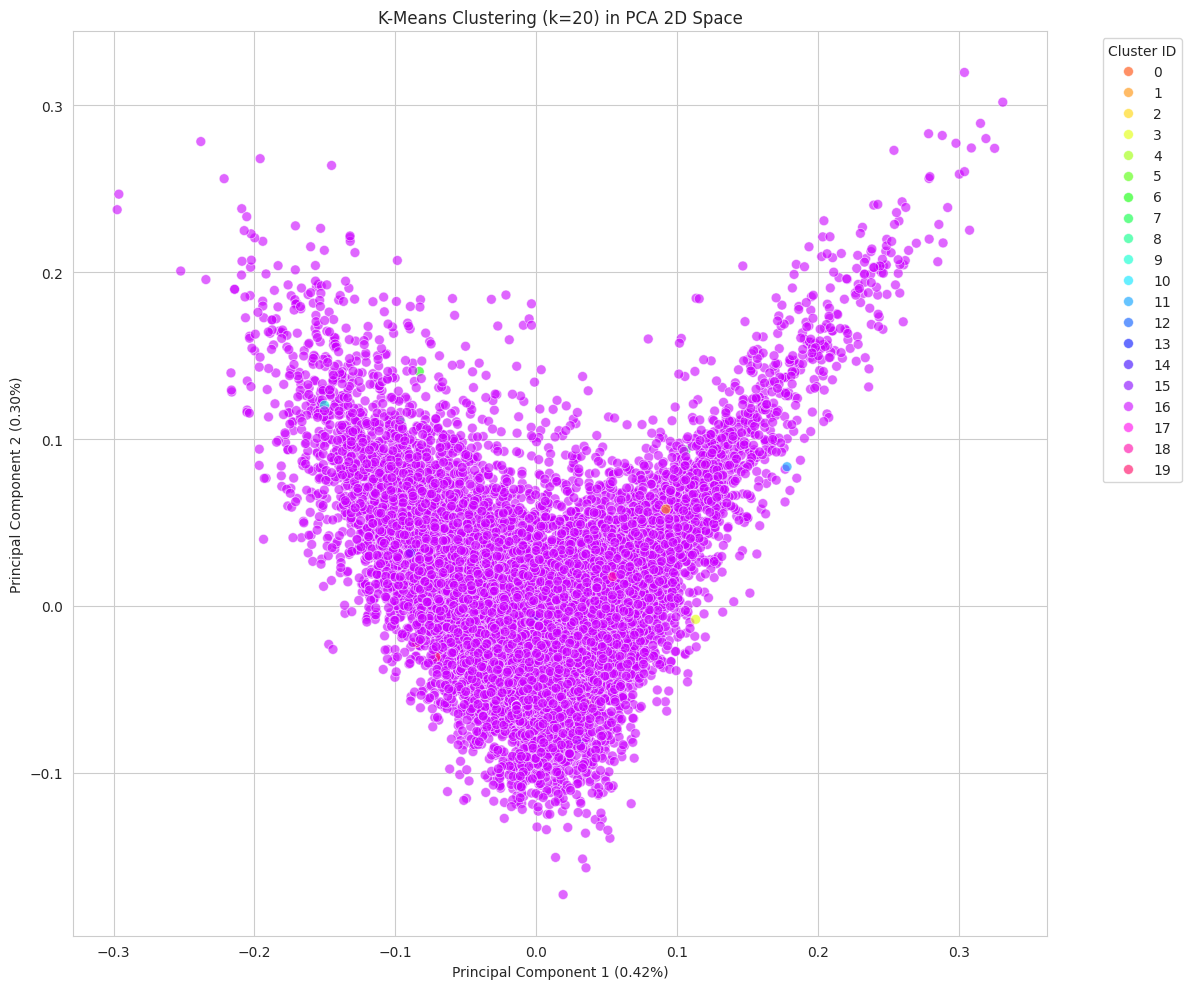

In [5]:
### 5. Dimensionality Reduction and Visualization

# Since the data is 26,000+ dimensions, we use PCA to reduce it to 2 components
# for visual representation of the clusters.

print("\n--- Visualizing Clusters with PCA ---")

# 1. Reduce dimensionality using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray()) # Convert sparse matrix to dense array for PCA

# 2. Create DataFrame for plotting
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = cluster_assignments

# 3. Plot the clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette=sns.color_palette("hsv", true_k),
    data=df,
    legend="full",
    alpha=0.6,
    s=50
)
plt.title(f'K-Means Clustering (k={true_k}) in PCA 2D Space')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

6. Model Prediction Demonstration (Unseen Document)

Demonstrate how the model assigns a cluster to new, unseen text data.

In [6]:
### 6. Illustrative Example: Basic Word Embedding Concept

# Word embeddings represent words as dense vectors, capturing semantic meaning.
# Unlike TF-IDF, they understand that 'dog' and 'canine' are similar.
# This example is conceptual, as training a full Word2Vec model is intensive.
# The core idea is that words are mapped to a continuous vector space:
#

# Conceptual steps for using embeddings for clustering (requires Gensim/NLTK setup):
# 1. Tokenize all documents (e.g., using NLTK's word_tokenize).
# 2. Train Word2Vec model on the tokens.
# 3. For each document, calculate the vector as the average of its constituent word vectors.
# 4. Use these document vectors (Dense Embeddings) instead of the sparse TF-IDF matrix for K-Means.


In [7]:
### 7. Model Evaluation and Prediction (Unseen Document)

# Demonstrate how the model assigns a cluster to a new, unseen document.

def predict_new_document(text_data, vectorizer, model):
    """Transforms a new document and predicts its cluster assignment."""
    # 1. Transform the new text using the *trained* vectorizer
    new_X = vectorizer.transform([text_data])

    # 2. Predict the cluster
    predicted_cluster = model.predict(new_X)[0]

    # 3. Find the closest true newsgroup name for that cluster (based on Section 4 analysis)
    # Since we can't definitively map cluster IDs to true names without a full matrix analysis,
    # we rely on the cluster ID itself.

    return predicted_cluster

# Example Unseen Document 1 (Should be 'comp.graphics' or similar)
new_doc_1 = "I need a fast program to render 3D graphics on my GPU. What ray tracing library do you recommend for animation?"
predicted_id_1 = predict_new_document(new_doc_1, vectorizer, km)

# Example Unseen Document 2 (Should be 'rec.sport.baseball' or similar)
new_doc_2 = "The Yankees bullpen is struggling this season. They need to trade for a reliable closer before the playoffs."
predicted_id_2 = predict_new_document(new_doc_2, vectorizer, km)

print("\n--- Prediction Demonstration on Unseen Documents ---")
print(f"Document 1 (Graphics query) assigned to Cluster ID: {predicted_id_1}")
print(f"Document 2 (Baseball query) assigned to Cluster ID: {predicted_id_2}")


--- Prediction Demonstration on Unseen Documents ---
Document 1 (Graphics query) assigned to Cluster ID: 16
Document 2 (Baseball query) assigned to Cluster ID: 16
